In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cleaning Training Data

In [2]:
train = pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train.shape

(6019, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
train.groupby('Seats')['Price'].nunique()

Seats
0.0        1
2.0       15
4.0       81
5.0     1161
6.0       30
7.0      390
8.0       97
9.0        3
10.0       4
Name: Price, dtype: int64

In [9]:
train.groupby('Mileage')['Price'].nunique()

Mileage
0.0 kmpl      59
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Price, Length: 442, dtype: int64

####  There are "0.0" as values in the columns of mileage,power and engine so it can be considered as nan or empty value

In [10]:
train.groupby('Engine')['Price'].nunique()

Engine
1047 CC      4
1061 CC     23
1086 CC     69
1120 CC     37
1150 CC      7
          ... 
970 CC       1
993 CC      12
995 CC       8
998 CC     117
999 CC      26
Name: Price, Length: 146, dtype: int64

#### From the above it is obvious that the mileage,seats,engine,power cannot be zero , so we can consider it as an empty data and will impute it with mean or mode.

#### we can see that the columns of mileage , engine and power are of string types so we first have to remove the string associated with it and convert it to float type.

In [11]:
def stringremover(doc):
    l = doc.split()
    for i in l:
        try:
            num = float(i)
            return num
        except:
            continue

#### Function to get only numeric value

In [12]:
mil_data = []
train['Mileage'] = train['Mileage'].fillna("0.0")
for i in range(len(train['Mileage'])):
    doc = train['Mileage'][i]
    res = stringremover(doc)
    mil_data.append(res)

In [13]:
train['Mileage'] = mil_data

In [14]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [15]:
eng_data = []
train['Engine'] = train['Engine'].fillna("0.0")
for i in range(len(train['Engine'])):
    doc = train['Engine'][i]
    res = stringremover(doc)
    eng_data.append(res)

In [16]:
train['Engine'] = eng_data

In [17]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [18]:
pow_data = []
train['Power'] = train['Power'].fillna("0.0")
for i in range(len(train['Power'])):
    doc = train['Power'][i]
    res = stringremover(doc)
    pow_data.append(res)

In [19]:
train['Power'] = pow_data

In [20]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
train['Mileage'].replace(0.0,np.nan,inplace=True)
np.mean(train['Mileage'])

18.342252479408355

#### So we can take the mean of mileage as 18.00

In [22]:
train['Mileage'].fillna(value=18.00,inplace=True)

In [23]:
train['Engine'].replace(0.0,np.nan,inplace=True)
np.mean(train['Engine'])

1621.276449941501

#### So we can take the mean of engine as 1162.0

In [24]:
train['Engine'].fillna(value=1162.0,inplace=True)

In [25]:
np.mean(train['Power'])

112.56341677943078

#### So we can take the mean of power as 113.00

In [26]:
train['Power'].replace(0.0,np.nan,inplace=True)
train['Power'].fillna(value=113.0,inplace=True)

In [27]:
train['Seats'].replace(0.0,np.nan,inplace=True)
np.mean(train['Seats'])

5.2796184738955825

#### so we can take the mean of seats as 5.0

In [28]:
train['Seats'].fillna(value=5.0,inplace=True)

In [29]:
train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### So we have succesfully imputed all the empty values and got the numeric values from the columns of mileage, power and engine

# EDA - Univariate Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [32]:
train.shape

(6019, 12)

Base information - 6019 different cars are analysed

In [33]:
train.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [34]:
train.describe() #summary statistics

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.338272,1618.529490,113.247038,5.277621,9.479468
std,3.269742,9.126884e+04,4.151282,600.598962,53.231033,0.803479,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1197.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


INFERANCE - The mean price of cars is 9.4 lakhs

INFERANCE - The highest price is 160 lakhs

INFERANCE - The lowest price is 0.44 lakhs

### ANALYSIS ON LOCATION

In [35]:
train.Location.nunique() #the no. of locations

11

In [36]:
train.Location.unique() #the different locations

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [37]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

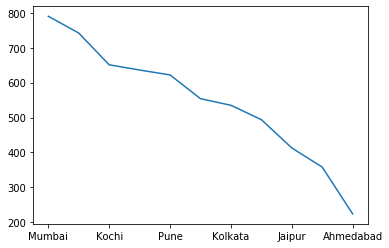

In [38]:
train.Location.value_counts().plot()

INFERENCE - There are 11 different locations

INFERENCE - The Maximum no. of cars are from Mumbai

INFERANCE - The Minimum no. of cars are from Ahmedabad

### ANALYSIS ON YEAR

In [39]:
train.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

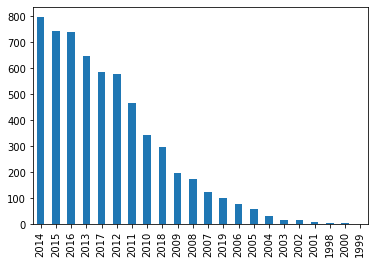

In [40]:
train.Year.value_counts().plot(kind='bar')

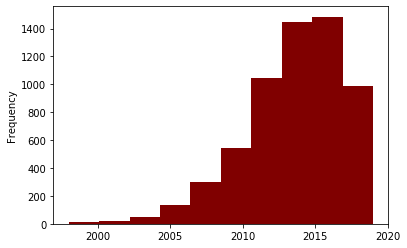

In [41]:
train.Year.plot(kind='hist',color='Maroon')

INFERENCE - The maximum no. of cars are from the year 2014 although the latest year in the data list is 2019 which had considerably lesser no. of cars 

### ANALYSIS ON KILOMETERS DRIVEN

In [42]:
print("Mean kilometers driven in the data is:",train.Kilometers_Driven.mean())

Mean kilometers driven in the data is: 58738.38029573019


In [43]:
print("Maximum kilometers driven in the data is:",train.Kilometers_Driven.max())

Maximum kilometers driven in the data is: 6500000


In [44]:
print("Minimum kilometers driven in the data is:",train.Kilometers_Driven.min())

Minimum kilometers driven in the data is: 171


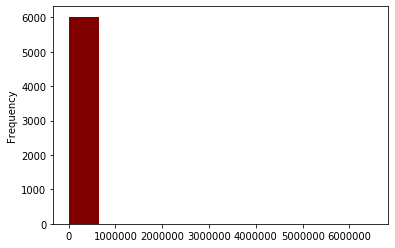

In [45]:
train.Kilometers_Driven.plot(kind='hist',color='Maroon')

### ANALYSIS ON FUEL TYPE

In [46]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [47]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

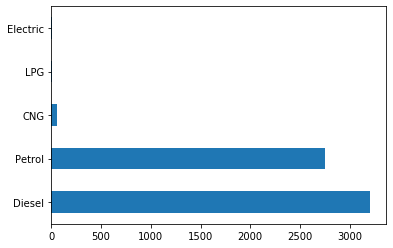

In [48]:
train.Fuel_Type.value_counts().plot(kind='barh')

INFERANCE - Maximum no. of cars are diesal cars

INFERANCE - Only two cars are electric cars and is at the minimum 

### ANALYSIS ON TRANSMISSION

In [49]:
train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

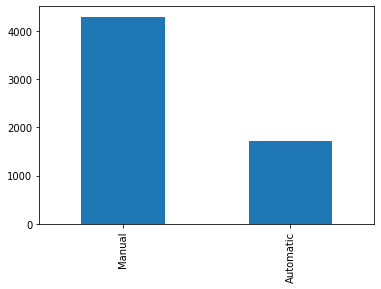

In [50]:
train.Transmission.value_counts().plot(kind='bar')

INFERANCE - More no. of cars are manual

### ANALYSIS ON OWNER TYPE

In [51]:
train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

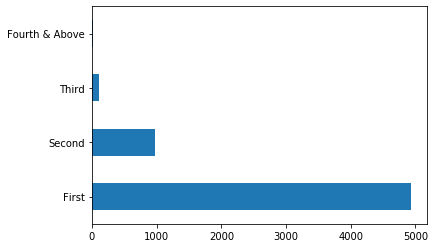

In [52]:
train.Owner_Type.value_counts().plot(kind='barh')

INFERANCE - close to 5000 cars are firsthand cars and less than 10 are fourth or below

### ANALYSIS ON MILEAGE

In [53]:
print("Minimum Mileage in the data is:",train.Mileage.min())
print("Maximum Mileage in the data is:",train.Mileage.max())
print("Range of Mileage is from {} to {}".format(train.Mileage.min(),train.Mileage.max()))

Minimum Mileage in the data is: 6.4
Maximum Mileage in the data is: 33.54
Range of Mileage is from 6.4 to 33.54


In [54]:
train.Mileage.mean()

18.33827213822899

In [55]:
train[train.Mileage > 18.33].Name.count()

2941

In [56]:
train[train.Mileage < 18.33].Name.count()

3073

INFERANCE - 2941 cars have mileage above the mean mileage

INFERANCE - 3073 cars have mileage below the mean mileage

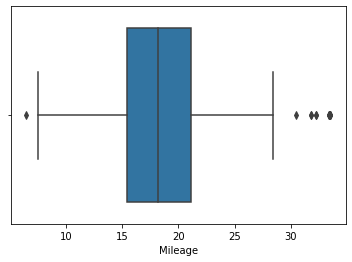

In [57]:
sns.boxplot(train['Mileage'])

### ANALYSIS ON ENGINE

In [58]:
print("Minimum engine volume in the data is:",train.Engine.min())
print("Maximum engine volume in the data is:",train.Engine.max())
print("Range of engine volume is from {} to {}".format(train.Engine.min(),train.Engine.max()))

Minimum engine volume in the data is: 72.0
Maximum engine volume in the data is: 5998.0
Range of engine volume is from 72.0 to 5998.0


In [59]:
train[train.Engine==72].Name

4446    Mahindra E Verito D4
Name: Name, dtype: object

In [60]:
train[train.Engine==5998].Name

5521    Bentley Continental Flying Spur
Name: Name, dtype: object

In [61]:
train.Engine.mean()

1618.5294899484963

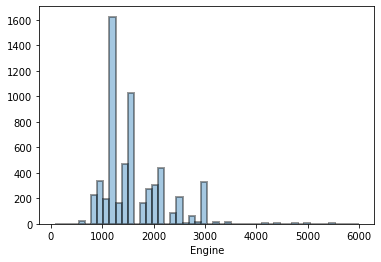

In [62]:
sns.distplot(train['Engine'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

### ANALYSIS ON POWER

In [63]:
print("Minimum power in the data is:",train.Power.min())
print("Maximum power in the data is:",train.Power.max())
print("Range of power is from {} to {}".format(train.Power.min(),train.Power.max()))

Minimum power in the data is: 34.2
Maximum power in the data is: 560.0
Range of power is from 34.2 to 560.0


In [64]:
train[train.Power==0].Name.count()

0

INFERENCE - 36 cars have 0 power

In [65]:
train[train.Power==560].Name.count()


1

In [66]:
train[train.Power==560].Name

5781    Lamborghini Gallardo Coupe
Name: Name, dtype: object

In [67]:
train.Power.mean()

113.24703771390512

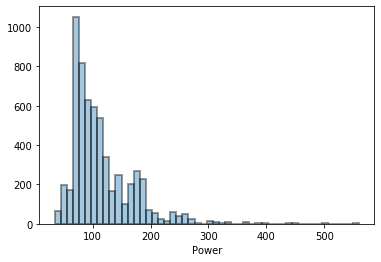

In [68]:
sns.distplot(train['Power'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

### ANALYSIS ON SEATS

In [69]:
print("Minimum seats in the data is:",train.Seats.min())
print("Maximum seats in the data is:",train.Seats.max())

Minimum seats in the data is: 2.0
Maximum seats in the data is: 10.0


In [70]:
train.Seats.mean()

5.277620867253697

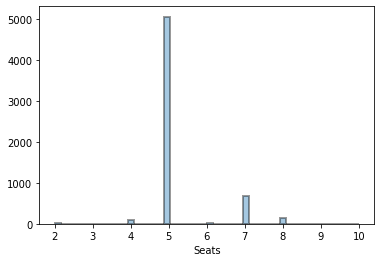

In [71]:
sns.distplot(train['Seats'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

In [72]:
train.Seats.value_counts()

5.0     5057
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

INFERANCE - Maximum no. of cars are 5 seaters followed by 7 seaters

### ANALYSIS ON PRICE

In [73]:
print("Minimum price in the data is:",train.Price.min())
print("Maximum price in the data is:",train.Price.max())
print("Price range is from {} to {}".format(train.Price.min(),train.Price.max()))

Minimum price in the data is: 0.44
Maximum price in the data is: 160.0
Price range is from 0.44 to 160.0


In [74]:
train.Price.mean()

9.479468350224273

In [75]:
train[train.Price==0.44].Name #cheapest car

1713    Tata Nano Lx
Name: Name, dtype: object

In [76]:
train[train.Price==160].Name #costliest car

4079    Land Rover Range Rover 3.0 Diesel LWB Vogue
Name: Name, dtype: object

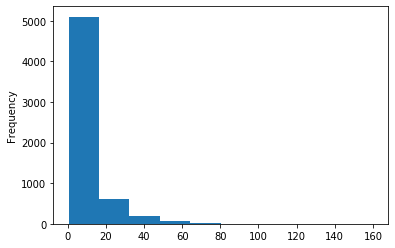

In [77]:
train.Price.plot(kind='hist')

INFERANCE - Maximum no. of cars are in the price range of 0.44 to 20 lakhs

#### Univariate analysis is completed.

## Cleaning testing data

In [78]:
test = pd.read_excel('Data_Test.xlsx')

In [79]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [80]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [81]:
mil_test_data = []
for i in range(len(test['Mileage'])):
    doc = test['Mileage'][i]
    res = stringremover(doc)
    mil_test_data.append(res)

In [82]:
test['Mileage'] = mil_test_data

In [83]:
eng_test_data = []
test['Engine'] = test['Engine'].fillna("0.0")
for i in range(len(test['Engine'])):
    doc = test['Engine'][i]
    res = stringremover(doc)
    eng_test_data.append(res)

In [84]:
test['Engine'] = eng_test_data

In [85]:
pow_test_data = []
test['Power'] = test['Power'].fillna("0.0")
for i in range(len(test['Power'])):
    doc = test['Power'][i]
    res = stringremover(doc)
    pow_test_data.append(res)

In [86]:
test['Power'] = pow_test_data

In [87]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [88]:
test['Mileage'].replace(0.0,np.nan,inplace=True)
np.mean(test['Mileage'])

18.367354627354615

In [89]:
test['Mileage'].fillna(value=18.00,inplace=True)

In [90]:
test['Engine'].replace(0.0,np.nan,inplace=True)
np.mean(test['Engine'])

1593.5849673202615

In [91]:
test['Engine'].fillna(value=1594.00,inplace=True)

In [92]:
test['Power'].replace(0.0,np.nan,inplace=True)
np.mean(test['Power'])

110.38042013311168

In [93]:
test['Power'].fillna(value=110.00,inplace=True)

In [94]:
test['Seats'].replace(0.0,np.nan,inplace=True)
np.mean(test['Seats'])

5.28454619787408

In [95]:
test['Seats'].fillna(value=5.00,inplace=True)

In [96]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [98]:
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64